# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [4]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'minggupal'
os.environ['KAGGLE_KEY'] = 'a48f474c8e9cf062427f6eaeee01deae'

In [6]:
!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions (c)    Commands related to Kaggle competitions
    datasets (d)        Commands related to Kaggle datasets
    kernels (k)         Commands related to Kaggle kernels
    config              Configuration settings


### 문제 2. 데이터 다운로드 및 압축 해제하기


In [7]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!kaggle datasets download -d andrewmvd/heart-failure-clinical-data
!unzip '*.zip'


heart-failure-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


'unzip'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [10]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [11]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [13]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [17]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 문제 5. 수치형 데이터의 히스토그램 그리기


<AxesSubplot:xlabel='age', ylabel='Count'>

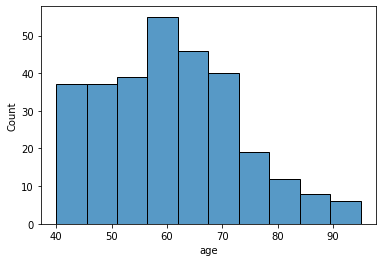

In [26]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기 -> 7개
## 연령대별 사망여부
## 크레아틴 키나제가<3000 인 대상별 사망자 카운트
## 관찰기간 별 사망여부
## 혈소판수와 크레아틴의 사망여부 분포
## 박출계수와 혈중 나트륨 레벨 과의 사망여부 분포 

#1
sns.histplot(data= df, x='age')

<AxesSubplot:xlabel='age', ylabel='Count'>

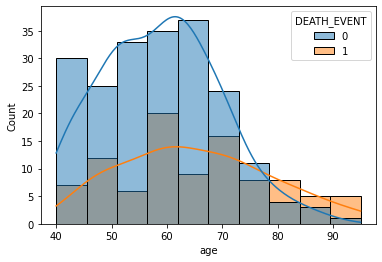

In [29]:
#1-1
sns.histplot(data= df, x='age', hue = 'DEATH_EVENT',kde = True)

<AxesSubplot:xlabel='creatinine_phosphokinase', ylabel='Count'>

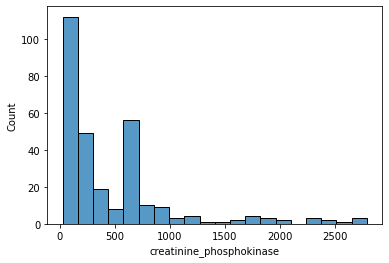

In [31]:
#2 크레아틴 키나제가<3000 인 대상 count 
sns.histplot(data= df.loc[df['creatinine_phosphokinase']<3000], x = 'creatinine_phosphokinase')

<AxesSubplot:xlabel='time', ylabel='Count'>

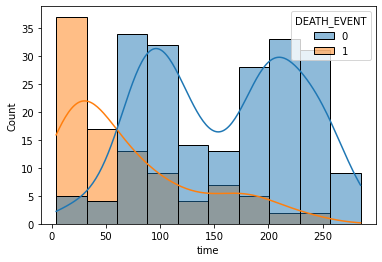

In [33]:
## 관찰기간 별 사망여부
sns.histplot(data=df, x='time', hue='DEATH_EVENT',kde =True)

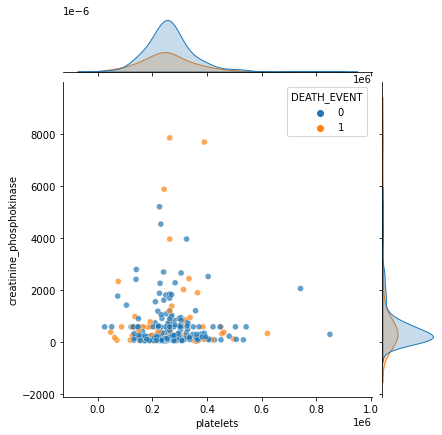

In [39]:
# 혈소판수와 크레아틴의 사망여부 분포
sns.jointplot(data = df, x='platelets', y= 'creatinine_phosphokinase', hue ='DEATH_EVENT', alpha = 0.7)

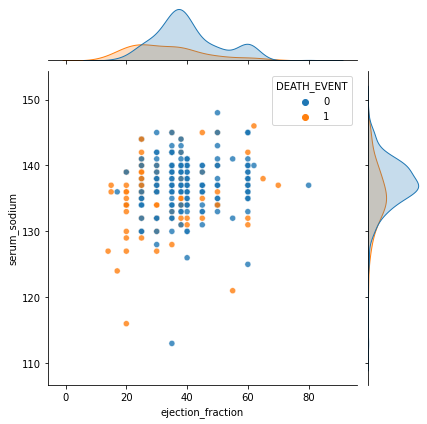

In [40]:
# 박출계수와 혈중 나트륨 레벨 과의 사망여부 분포 
sns.jointplot(data = df, x= 'ejection_fraction', y= 'serum_sodium', hue = 'DEATH_EVENT', alpha = 0.8)

### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

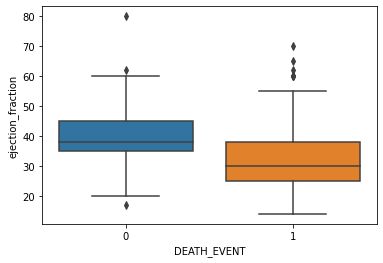

In [41]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능

#1 사망 박출게수
#2 흡연 박출게수
#3 사망 박출계수
#4 사망 혈소판수 - 흡연 

#1 사망 박출게수
sns.boxplot(data = df, x= 'DEATH_EVENT', y='ejection_fraction')

<AxesSubplot:xlabel='smoking', ylabel='ejection_fraction'>

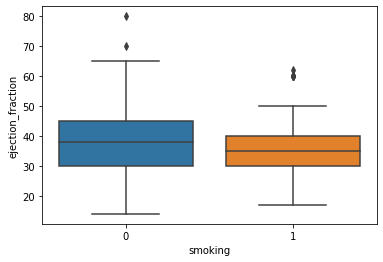

In [44]:
#2 흡연 박출게수
sns.boxplot(data = df, x= 'smoking', y='ejection_fraction')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

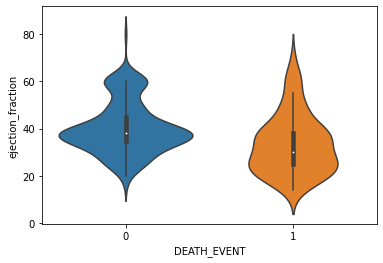

In [45]:
#3 사망 박출계수
sns.violinplot(data = df, x= 'DEATH_EVENT', y='ejection_fraction')

c:\Users\minja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

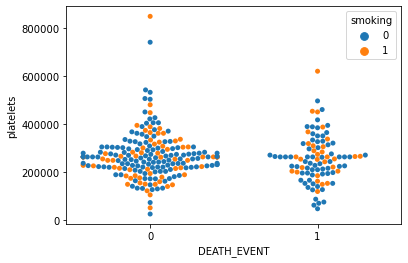

In [49]:
#4 사망 혈소판수 - 흡연 
sns.swarmplot(data = df, x= 'DEATH_EVENT', y='platelets', hue ='smoking')

plt.show

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 7. StandardScaler를 이용하여 데이터 전처리하기


In [50]:
from sklearn.preprocessing import StandardScaler

In [76]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [78]:
# 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
X_num = df[['age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia','diabetes','high_blood_pressure','sex','smoking']]
y = df['DEATH_EVENT']


In [82]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기★
Scaler = StandardScaler()
Scaler.fit(X_num)
X_scaled = Scaler.transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled, index= X_num.index, columns = X_num.columns)
X = pd.concat([X_scaled, X_cat],axis=1)


In [84]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
X.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


### 문제 8. 학습데이터와 테스트데이터 분리하기


In [85]:
from sklearn.model_selection import train_test_split
 

In [92]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state=1)

In [93]:
X_test

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
173,-0.912335,-0.481942,-1.530560,-0.761549,-0.575031,0.539054,1,0,0,1,0
287,-1.333392,0.000166,1.431768,2.863994,-0.381379,-1.050016,0,1,0,0,0
51,-0.659702,-0.506718,-1.530560,1.583788,0.005926,0.539054,1,0,1,0,0
146,-0.743913,-0.464392,-0.684180,-0.464541,-0.671857,-0.141976,0,0,0,1,1
214,0.350833,-0.461295,-0.260991,0.272858,-0.575031,-0.595996,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
122,-0.070223,-0.501556,-0.007077,-0.362124,-0.623444,0.766064,0,1,0,0,0
246,-0.491279,1.481588,-1.107370,0.518657,-0.284552,0.312044,0,0,0,1,0
278,-0.912335,0.484338,-0.684180,-0.321158,-0.671857,-0.141976,1,1,0,0,0
251,-0.491279,-0.010158,-0.260991,-0.331400,-0.575031,1.447094,0,1,0,0,0


## Step 4. Classification 모델 학습하기


### 문제 9. Logistic Regression 모델 생성/학습하기


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# LogisticRegression 모델 생성/학습
model_lr = 




### 문제 10. 모델 학습 결과 평가하기


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = 




### 문제 11. XGBoost 모델 생성/학습하기


In [ ]:
from xgboost import XGBClassifier

In [ ]:
# XGBClassifier 모델 생성/학습
model_xgb = 




### 문제 12. 모델 학습 결과 평가하기


In [ ]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = 




### 문제 13. 특징의 중요도 확인하기


In [ ]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot





## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Precision-Recall 커브 확인하기

In [ ]:
from sklearn.metrics import plot_precision_recall_curve

In [ ]:
# 두 모델의 Precision-Recall 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)





### 문제 15. ROC 커브 확인하기

In [ ]:
from sklearn.metrics import plot_roc_curve

In [ ]:
# 두 모델의 ROC 커브를 한번에 그리기 (힌트: fig.gca()로 ax를 반환받아 사용)



